In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

## Data of the legendary Titanic 

Data of the Titanic are accessible as .csv file through the following link:  

https://www.kaggle.com/c/titanic/data



In [2]:
# Import Titanic csv file as dataframe
titanic_df = pd.read_csv('train.csv')

# Preview of the Titanic data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A quick look at the info of the dataframe and the number of non-null elements.  
As obvious in the following list, all of the data is almost complete except data of the Cabin.

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Passenger's Information

Here we extract the passenger's information such as gender, age, ...  


To check the gender of the passengers we can use .catplot method.

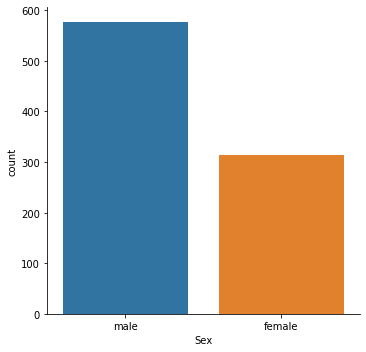

In [4]:
sns.catplot(x='Sex',kind='count',data=titanic_df)

The number of male passengers are almost doubled the femail ones.   

Lets check the gender by classes.  
Interestingly, the distrubutions of male/female passengers in first and second classes are more or less the same. However, it is a great number of male passenger in third class, respect ot femail ones.

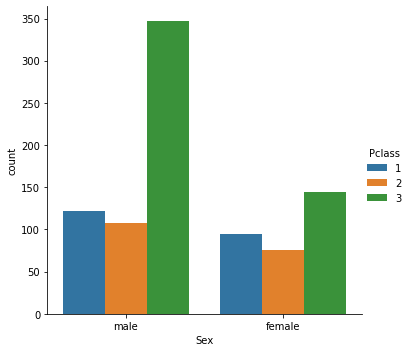

In [5]:
#separate genders by classes
sns.catplot(x='Sex', kind='count', hue='Pclass', data=titanic_df)

Change a classification for better visualization. So now, number of male/female passengers in each class.

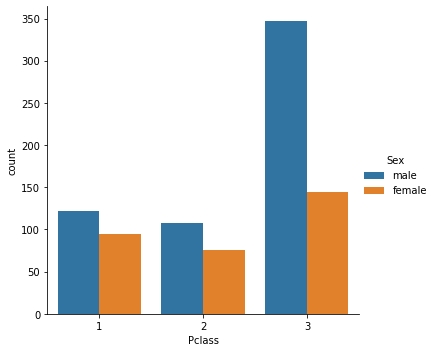

In [6]:
sns.catplot(x='Pclass', kind='count', hue='Sex', data=titanic_df)

So it would be great if classified not only by female/male but also childern.  
As we don't have the data of children separately, we can do it ourselves by applying a threshold on age.  
We can consider person under 16 as a child.

In [7]:
# Function to return male/female/children
def male_female_child(passenger):
    age, sex = passenger
    # Check if the input is a child
    if age<16:
        return 'child'
    else:
        return sex

In [8]:
# Add new "person" column by applying our male_female_child function
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [9]:
# Overview of the data, new with new "Person" column
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


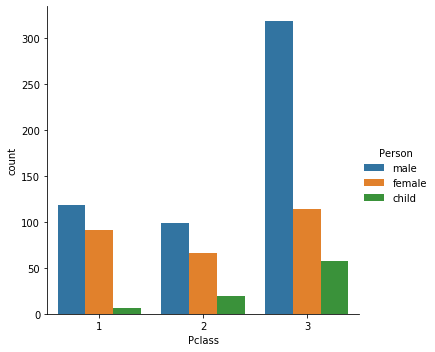

In [10]:
sns.catplot(x='Pclass', kind='count', hue='Person', data=titanic_df)

This diagram shows that:
- In general, there are more people in third class
- For first and second classes distribution of male/female/child are more or less the same
- The number of male respect to female/child are considerable in the third class


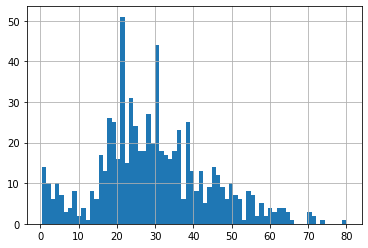

In [11]:
# Distribution of ages
titanic_df['Age'].hist(bins=70)

The age distribution shows that the average age of the passengers is about 30 years old and the people between 20-40 years old the main population of the Titanic ship.  

There is also a peak in kids below 7-8 years and it could be intereting if one extract the average family age on that time.

In [12]:
titanic_df['Age'].mean()

29.69911764705882

A summary of number of male/female/child passengers:

In [13]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Using .FacetGrid method, it is possible to have multiple plotting and then by .map method applying speciall type of plot on those multiple parameters. 

For example, in the following there are kdeplots of age _maped_ to different genders ('Sex' aspect in the dataframe) which previously determined by .FacetGrid method.

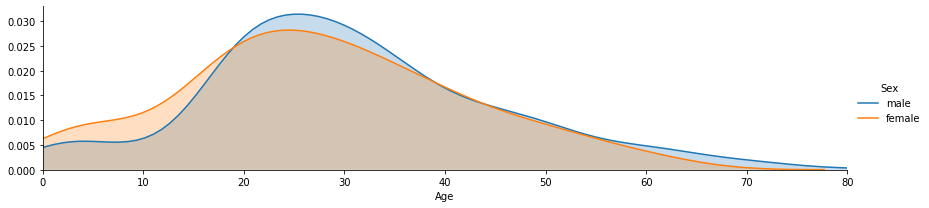

In [14]:
# FacetGrid on titanic_df dataframe with 'Sex' as looking parameter and the asxpect ratio of the figure will be 4
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
# Map multiple kdeplots of the Age with 'Sex' as looking parameter
fig.map(sns.kdeplot, 'Age', shade=True)

# Set oldest age as a x maximum limit and then add legend
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Here the kdeplot of ages are applied on 'Person' aspect.  
*Note: The diagrams are normalized and not in count mode.*

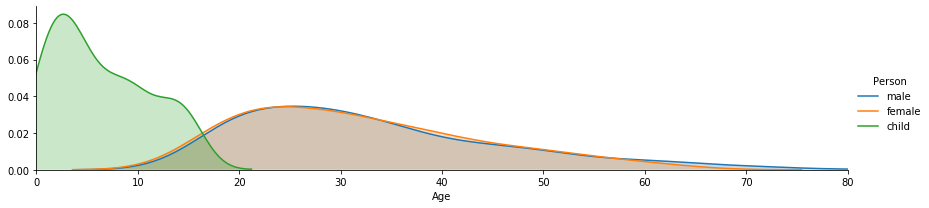

In [15]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

As it is shown, the distributions of male/female on the ship are the same. Only at the tail of the kdeplots is a small difference which tells that there are more elder males respect to females were on the board. 

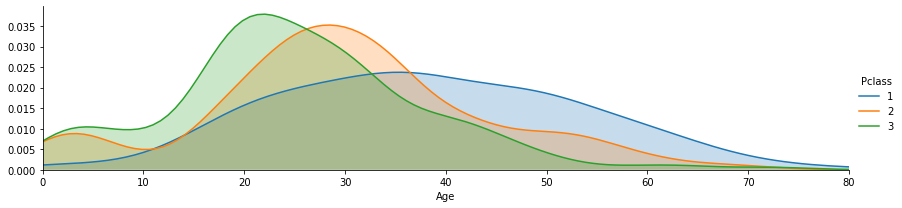

In [16]:
# Map kdeplots of Age on different classes
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

# set x max limit and add legend
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Interestingly, looking at age distribution of different classes:
- There are less young male/female on first class
- Most of the families with a child use 2nd & 3rd class, which could be resonable due to the cost-size_of_family relation.
- There are less elder male/female in 2nd & 3rd class and most of them used a first class, which again could be resonable as after many years of working they have enough money to enjoy their trip, especially if it is Titanic.

## Deck and Classes
The other question that we can ask is the relation between passenger's deck and their class.  

As the data of Deck is not complete and there are a lot of missing information, first of all I drop the nan values from the dataset. 

In [17]:
# Drop nan values
deck = titanic_df['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

To extract the deck from the cabins we need the first letter of the cabin.

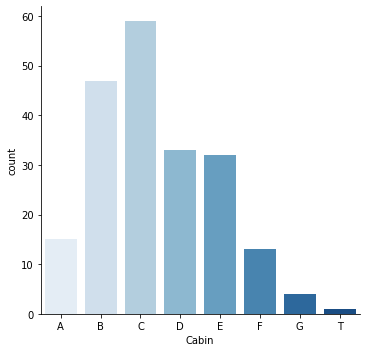

In [19]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin', kind='count', data=cabin_df, palette='Blues',
            order=np.sort(cabin_df.Cabin.unique()))

From the above diagram we couldn't concluded any reliable result as there are a lots of missing information about cabins. We are not sure that the missings were randomly distributed.  

However, we can continue with the assumption of randomly uniformed missing data!  

As practicaly, there is no 'T' deck in Titanic ship, we can drop it.

In [20]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

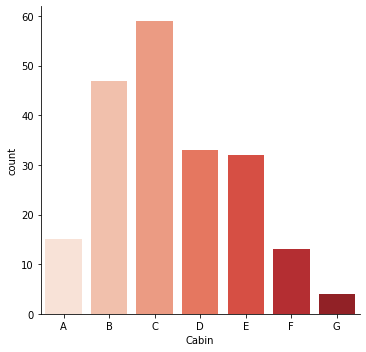

In [21]:
sns.catplot(x='Cabin', kind='count', data=cabin_df, palette='Reds',
            order=np.sort(cabin_df.Cabin.unique()))

## Where the passengers come frome?

It would be interesting if we check the horbors that passengers get in to the ship.  

We have C, Q, and S in Embarked column in our dataframe. Based on the informaiton on Kaggle, these letters stand for Cherbourg, Queenstown, Southhampton, respectively.

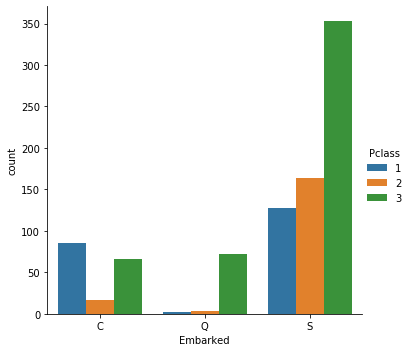

In [22]:
sns.catplot(x='Embarked', kind='count', data=titanic_df, hue='Pclass', order=['C','Q','S'])

An interest observation here is that all of the passenger from Queenstown were 3rd class. It is valuable doing more research on the economic condition of that town on that time.  

Cherbourg city is also intreresting as the passengers were 1st or 3rd class and there were a few portion of middle class passenger there. Also, 1st class passengeres were more that 3rd class ones in that city. 

## Who was alone and who was with family

There are two columns SibSp and Parch in the dataset which stand for siblings and Parent/child, respectively. If both values are zero, it means that the passenger was completely alone (from a family point of view of course).

In [25]:
# make a new column to find alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
#titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
#titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'
titanic_df.loc[:,'Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df.loc[:,'Alone'].loc[titanic_df['Alone']==0] = 'Alone'

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


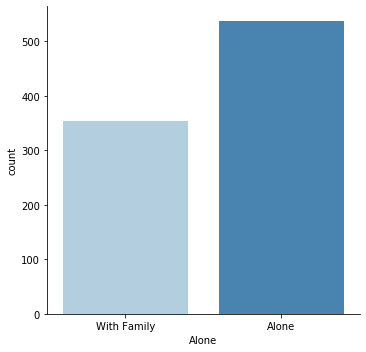

In [28]:
sns.catplot(x='Alone', kind='count', data=titanic_df, palette='Blues')

So there are more alone people on board. Roughly 60% alone and 40% with family.

## Who survives

So we come to the main question that who survives and which factors help one to be survived. We can use all of the previous observation to figure out these parameters. Definitly there might be more parameters and you can think of them.

In [29]:
# Make new column for Survivors
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

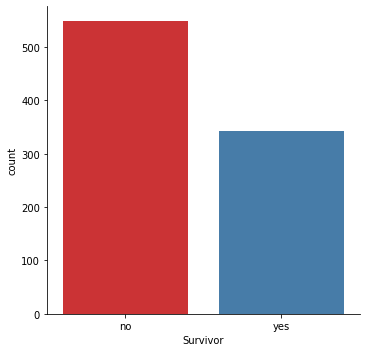

In [31]:
sns.catplot(x='Survivor', kind='count', data=titanic_df, palette='Set1')

So unfortunately most of the passengers died in that tragic event. Let's figure out the related parameters.  

Let see if the class affect the survivance.

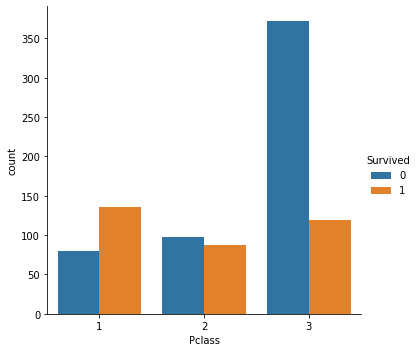

In [40]:
sns.catplot(x='Pclass', kind='count', hue='Survived', data=titanic_df)

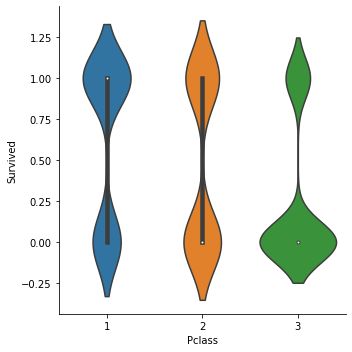

In [39]:
sns.catplot(x='Pclass', y='Survived', kind = 'violin', data=titanic_df)

The above diagrams show that most of the 1st class passengers could survive, for 2nd class it is 50/50 but most of the 3rd class died.  

But it is not easy to say that it was due to just the class of the passengers but maybe female/child first priority and also age priority matters.  

If you remember there were more ratio of female/child and also elder people in 1st class. 

So let see the effect of gender on the survivance. 

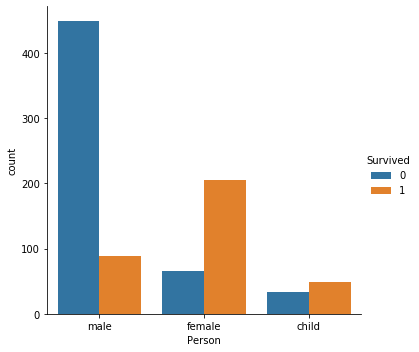

In [60]:
sns.catplot(x='Person', kind='count', hue='Survived', data=titanic_df)

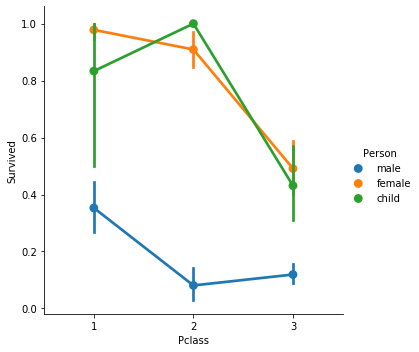

In [58]:
sns.catplot(x='Pclass', y='Survived', kind = 'point', hue='Person', data=titanic_df)

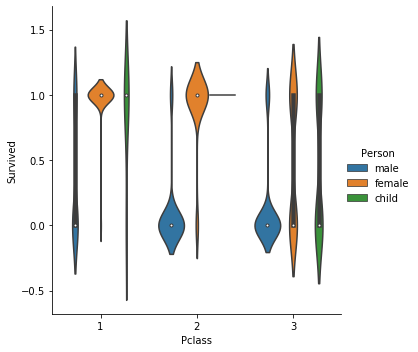

In [59]:
sns.catplot(x='Pclass', y='Survived', kind = 'violin', hue='Person', data=titanic_df)

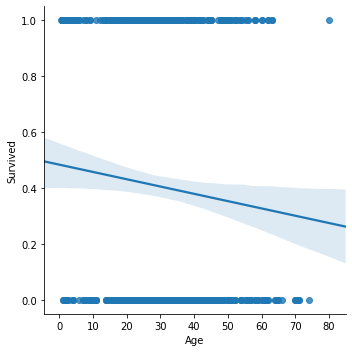

In [63]:
sns.lmplot('Age','Survived', data=titanic_df)

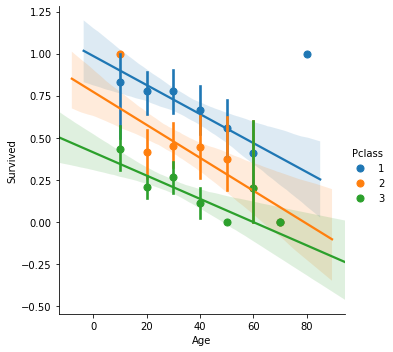

In [69]:
generations = [10, 20, 30, 40, 50, 60, 70, 80]
sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, x_bins=generations)